## Imports

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

## Example 1: Building an Artificial Neural Network for Binary Classification on The Heart Dataset

### The Heart Datset

File name: 'D6_Heart_Dataset_2.csv'

This dataset has been obtained from Kaggle.

The dataset contains 303 observations with 13 features and 1 class label with 0 and 1 values.
These features are discussed below:
1. age: in years
2. sex: (1 = male; 0 = female)
3. cp: chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic)
4. trestbps: resting blood pressure, in mm Hg on admission to the hospital
5. chol: serum cholestrol in mg/dl
6. fbs: fasting blood sugar, 120 mg.dl (1 = true; 0 = false)
7. restecg: restinng electrocardiographic results (values: 0,1,2)
8. thalach: maximum heart ache achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
12. ca: number of major vessels (0-3) coloured by flouroscopy
13. thal: (3 = normal; 6 = fixed defect; 7 = reversable defect)
14. target: the predicted attribute, diagnosis of heart disease (0 = fit; 1 = diseased)

This is a binary classification problem.
Does not contain any categorical data, the dataset is clean. sed)

In [ ]:
#Reading the file into a dataframe
PATH='C:/Users/maria/Dropbox/Machine Learning and Deep Learning/Machine Learning/Undergraduate/Lectures/Datasets and Notebooks' #laptop
#PATH='C:/Users/admin/Dropbox/Machine Learning and Deep Learning/Machine Learning/Undergraduate/Lectures/Datasets and Notebooks'  #office
data=pd.read_csv(f'{PATH}/D6_Heart_Dataset_2.csv')

#Displaying the read contents
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
# separating predictors
X_heart = data.drop("target",axis=1)

# separating target
Y_heart = data["target"]

In [ ]:
# Splitting the dataset
X_heart_train,X_heart_test,Y_heart_train,Y_heart_test = train_test_split(X_heart,Y_heart,test_size=0.80,random_state=0)

In [ ]:
X_heart_train.shape

(60, 13)

### Defining the Neural Network Architecture

- The Sequential class in Keras is used to create neural networks.
- It is a linear stack of layers.
- It allows addition of one layer at a time, and each layer has exactly one input tensor and one output tensor.
- Each layer automatically receives the output of the previous one as its input.

In [ ]:
from keras import models
from keras import layers


# Start neural network
network1 = models.Sequential()
# Adding input layer
network1.add(layers.Input(shape=(13,)))
# Adding fully connected layer with a ReLU activation function
network1.add(layers.Dense(units=16, activation="relu", name='m1_hidden1'))
# Adding fully connected layer with a ReLU activation function
network1.add(layers.Dense(units=16, activation="relu",name='m1_hidden2'))
# Adding fully connected layer with a sigmoid activation function
network1.add(layers.Dense(units=1, activation="sigmoid",name='m1_output'))

network1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 m1_hidden1 (Dense)          (None, 16)                224       
                                                                 
 m1_hidden2 (Dense)          (None, 16)                272       
                                                                 
 m1_output (Dense)           (None, 1)                 17        
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Alternate definition
network1 = models.Sequential([layers.Input(shape=(13,)),
                              layers.Dense(units=16, activation="relu", name='m1_hidden1'),
                              layers.Dense(units=16, activation="relu",name='m1_hidden2'),
                              layers.Dense(units=1, activation="sigmoid",name='m1_output'),
                             ])
network1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 m1_hidden1 (Dense)          (None, 16)                224       
                                                                 
 m1_hidden2 (Dense)          (None, 16)                272       
                                                                 
 m1_output (Dense)           (None, 1)                 17        
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


### Compiling the Neural Network

In [ ]:
network1.compile(loss="binary_crossentropy",
                 optimizer="rmsprop",
                 metrics=["accuracy"])

### Training the Neural Network

In [ ]:
#Setting some hyperparameters
batch_size = 5
nr_epochs = 50

In [ ]:
%%time
history1=network1.fit(X_heart_train, Y_heart_train,
                      batch_size=batch_size,
                      epochs=nr_epochs, verbose=0,
                      validation_data=(X_heart_test,Y_heart_test))

Wall time: 4.27 s


### Plotting the Learning Curves

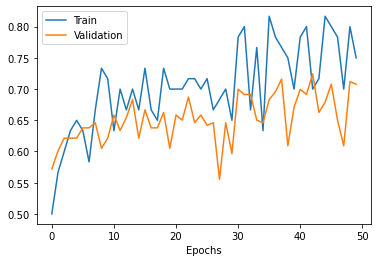

In [ ]:
#Plotting the learning curves for train and test accuracy
plt.plot(history1.history['accuracy'], label='Train')
plt.plot(history1.history['val_accuracy'], label='Validation')
plt.xlabel("Epochs")
plt.legend()
plt.show()

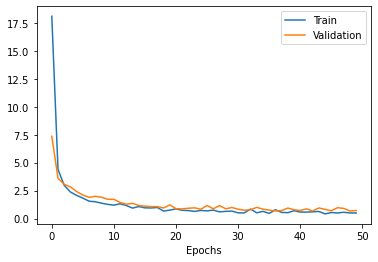

In [ ]:
#Plotting the learning curves for train and test loss
plt.plot(history1.history['loss'], label='Train')
plt.plot(history1.history['val_loss'], label='Validation')
plt.xlabel("Epochs")
plt.legend()
plt.show()

### Evaluating the Neural Network

In [ ]:
test_loss1, test_accuracy1 = network1.evaluate(X_heart_test, Y_heart_test)
print(f'Test loss is {test_loss1:0.3}')
print(f'Test accuracy is {test_accuracy1:0.1%}')

8/8 [==============================] - 0s 1ms/step - loss: 0.7146 - accuracy: 0.7078
Test loss is 0.715
Test accuracy is 70.8%


## Example 2: Building an Artificial Neural Network for Multiclass Classification on The Reuters Dataset

### The Reuters Dataset

- The Reuters dataset in Keras is a classic benchmark for multiclass text classification.
- It contains thousands of newswires (short news reports) from Reuters, labeled over 46 different topics.

- Key Features:
  - Dataset: Reuters newswires (1986 Reuters dataset)
  - Number of classes: 46 distinct topics (e.g., politics, economics, markets)
  - Total samples: ~11,228 newswires
  - Input: Each newswire is encoded as a sequence of word indexes (integers).
  - Output: A label (integer between 0 and 45) representing the topic.

### Text Encoding of Reuters Dataset

- Each sentence is encoded a a sequence of integers.
- Each number corresponds to a specific word in a dictionary built from the entire corpus.
- This is needed because:
  - the neural networks can’t directly process text; they need numerical input,
  - so integer encoding is a simple and effective way to convert words to numbers.
- Different text encoding schemes are available.

- In Keras, the Rueters dataset are encoded as follows:
  - The dictionary assigns lower indexes to more frequent words (like "the", "and", "market").
  - The word-to-index mapping is consistent across the dataset, but not directly human-readable.
  - Allow easy preprocessing (like truncating or padding to a fixed length).
  - For example:
    - Sentence: "The stock market surged today due to..."
    - Encoding: [1, 447, 43, 103 19, 2 ...]

### Loading and Exploring the Reuters Dataset

In [ ]:
from keras.datasets import reuters

# Set the number of features
number_of_features = 5000

# Load features (word indices) and target data
(X_reuters_train, Y_reuters_train), (X_reuters_test, Y_reuters_test) = reuters.load_data(num_words=number_of_features)

In [ ]:
len(Y_reuters_test)

2246

In [ ]:
X_reuters_train

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 2, 2, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110, 59

In [ ]:
Y_reuters_train

array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)

In [ ]:
# Checking out a newswire
newswire_no=6
print('Newswire:')
print(X_reuters_train[newswire_no])
print('Label:')
print(Y_reuters_train[newswire_no])

Newswire:
[1, 56, 2, 925, 149, 8, 16, 23, 931, 3875, 25, 116, 5, 165, 15, 10, 67, 13, 12, 12, 11, 2, 400, 81, 79, 457, 145, 22, 331, 28, 3026, 331, 61, 3609, 2097, 2, 79, 64, 85, 1863, 84, 22, 44, 2, 2275, 79, 296, 1384, 157, 2, 8, 16, 23, 3875, 4, 116, 6, 837, 2, 6, 3834, 31, 248, 1032, 2, 4, 1618, 5, 37, 38, 1639, 27, 358, 37, 38, 4716, 9, 6, 2, 4, 316, 9, 662, 5, 4, 765, 5, 291, 58, 60, 2660, 1067, 136, 4, 384, 292, 270, 120, 17, 12]
Label:
4


In [ ]:
# Mapping the newswire back to the original words

# Load the word index dictionary (word → integer)
word_index = reuters.get_word_index()

# Reversing word index to map integer indexes to their respective words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Decoding the review, mapping integer indices to words
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in X_reuters_train[newswire_no]])

decoded_review

'? lt ? america ltd said it is again extending its offer of 13 dlrs a share for 3 3 mln ? development corp shares until today from yesterday at midnight yesterday 7 242 117 ? shares had been tendered up from 5 ? 165 shares 24 hours earlier ? said it is extending the offer to allow ? to comply with federal law ? the ownership of u s airlines by non u s citizens and to ? the terms and conditions of the letter of credit or bank guarantee required under the previously announced acquisition agreement reuter 3'

### Preprocessing Reuters Dataset

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer

# Convert feature data to a one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
X_reuters_train_ = tokenizer.sequences_to_matrix(X_reuters_train, mode="binary")
X_reuters_test_ = tokenizer.sequences_to_matrix(X_reuters_test,mode="binary")

# One-hot encode target vector to create a target matrix
Y_reuters_train_ = to_categorical(Y_reuters_train)
Y_reuters_test_ = to_categorical(Y_reuters_test)

### Defining the Neural Network Architecture

In [ ]:
network2 = models.Sequential()
network2.add(layers.Input(shape=(number_of_features,)))
network2.add(layers.Dense(units=100,activation="relu"))
network2.add(layers.Dense(units=100, activation="relu"))
network2.add(layers.Dense(units=46, activation="softmax"))

network2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               500100    
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 46)                4646      
                                                                 
Total params: 514,846
Trainable params: 514,846
Non-trainable params: 0
_________________________________________________________________


### Compiling the Neural Network

In [ ]:
network2.compile(loss="categorical_crossentropy",
                optimizer="rmsprop",
                metrics=["accuracy"])

### Training the Neural Network

In [ ]:
%%time
history2 = network2.fit(X_reuters_train_,
                      Y_reuters_train_,
                      epochs=20,
                      verbose=0,
                      batch_size=100,
                      validation_data=(X_reuters_test_, Y_reuters_test_))

Wall time: 15.5 s


### Evaluating the Neural Network

In [ ]:
test_loss2, test_accuracy2 = network2.evaluate(X_reuters_test_, Y_reuters_test_)
print(f'Test loss is {test_loss2:0.3}')
print(f'Test accuracy is {test_accuracy2:0.1%}')

71/71 [==============================] - 0s 2ms/step - loss: 1.5745 - accuracy: 0.7818
Test loss is 1.57
Test accuracy is 78.2%


In [ ]:
train_loss2, train_accuracy2 = network2.evaluate(X_reuters_train_, Y_reuters_train_)
print(f'Train loss is {train_loss2:0.3}')
print(f'Train accuracy is {train_accuracy2:0.1%}')

281/281 [==============================] - 1s 2ms/step - loss: 0.0673 - accuracy: 0.9676
Train loss is 0.0673
Train accuracy is 96.8%


### Reducing Overfitting with Weight Regularization

In [ ]:
from keras import regularizers

# Defining network architecture
network2a = models.Sequential()
network2a.add(layers.Input(shape=(number_of_features,)))
network2a.add(layers.Dense(units=100,activation="relu",
                          kernel_regularizer=regularizers.l2(0.01),))
network2a.add(layers.Dense(units=100, activation="relu"))
network2a.add(layers.Dense(units=46, activation="softmax"))

# Compiling the Network
network2a.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

# Training the network
history2a = network2a.fit(X_reuters_train_, Y_reuters_train_, epochs=3, verbose=0, batch_size=100,
                      validation_data=(X_reuters_test_, Y_reuters_test_))

# Evaluating the model
test_loss2a, test_accuracy2a = network2a.evaluate(X_reuters_test_, Y_reuters_test_)
print(f'Test loss is {test_loss2a:0.3}')
print(f'Test accuracy is {test_accuracy2a:0.1%}')
train_loss2a, train_accuracy2a = network2a.evaluate(X_reuters_train_, Y_reuters_train_)
print(f'Train loss is {train_loss2a:0.3}')
print(f'Train accuracy is {train_accuracy2a:0.1%}')

71/71 [==============================] - 0s 2ms/step - loss: 1.2594 - accuracy: 0.7578
Test loss is 1.26
Test accuracy is 75.8%
281/281 [==============================] - 1s 2ms/step - loss: 0.9656 - accuracy: 0.8386
Train loss is 0.966
Train accuracy is 83.9%


### Reducing Overfitting with Dropout

In [ ]:
from keras import regularizers

# Defining network architecture
network2b = models.Sequential()
network2b.add(layers.Input(shape=(number_of_features,)))
network2b.add(layers.Dense(units=100,activation="relu"))
network2b.add(layers.Dense(units=100, activation="relu"))
network2b.add(layers.Dropout(0.2))
network2b.add(layers.Dense(units=46, activation="softmax"))

# Compiling the Network
network2b.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

# Training the network
history2b = network2b.fit(X_reuters_train_, Y_reuters_train_, epochs=3, verbose=0, batch_size=100,
                      validation_data=(X_reuters_test_, Y_reuters_test_))

# Evaluating the model
test_loss2b, test_accuracy2b = network2b.evaluate(X_reuters_test_, Y_reuters_test_)
print(f'Test loss is {test_loss2b:0.3}')
print(f'Test accuracy is {test_accuracy2b:0.1%}')
train_loss2b, train_accuracy2b = network2b.evaluate(X_reuters_train_, Y_reuters_train_)
print(f'Train loss is {train_loss2b:0.3}')
print(f'Train accuracy is {train_accuracy2b:0.1%}')

71/71 [==============================] - 0s 2ms/step - loss: 0.9040 - accuracy: 0.7952
Test loss is 0.904
Test accuracy is 79.5%
281/281 [==============================] - 1s 2ms/step - loss: 0.3805 - accuracy: 0.9159
Train loss is 0.38
Train accuracy is 91.6%


### Reducing Overfitting with Early Stopping

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Defining network architecture
network2c = models.Sequential()
network2c.add(layers.Input(shape=(number_of_features,)))
network2c.add(layers.Dense(units=100,activation="relu"))
network2c.add(layers.Dense(units=100, activation="relu"))
network2c.add(layers.Dense(units=46, activation="softmax"))

# Compiling the Network
network2c.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor="val_loss", patience=2),
             ModelCheckpoint(filepath="best_model.h5", monitor="val_loss", save_best_only=True)]
# EarlyStopping stops training early if the model stops improving on the validation set.
# If the validation loss doesn't improve for 2 consecutive epochs (patience), training is stopped.
# ModelCheckpoint saves the model during training in an HDF5 format file called "best_model.h5".
# Only saves the model if the validation loss improves (i.e., is lower than the previous best).

# Training the network
history2c = network2c.fit(X_reuters_train_, Y_reuters_train_, epochs=3, verbose=0, batch_size=100,
                          callbacks=callbacks, # Early stopping
                          validation_data=(X_reuters_test_, Y_reuters_test_))

# Evaluating the model
test_loss2c, test_accuracy2c = network2c.evaluate(X_reuters_test_, Y_reuters_test_)
print(f'Test loss is {test_loss2b:0.3}')
print(f'Test accuracy is {test_accuracy2c:0.1%}')
train_loss2c, train_accuracy2c = network2c.evaluate(X_reuters_train_, Y_reuters_train_)
print(f'Train loss is {train_loss2c:0.3}')
print(f'Train accuracy is {train_accuracy2c:0.1%}')

71/71 [==============================] - 0s 2ms/step - loss: 0.8745 - accuracy: 0.8010
Test loss is 0.904
Test accuracy is 80.1%
281/281 [==============================] - 1s 2ms/step - loss: 0.3239 - accuracy: 0.9316
Train loss is 0.324
Train accuracy is 93.2%


## Example 3: Training a Regressor

### Generating Data

In [ ]:
from sklearn.datasets import make_regression

# Generate features matrix and target vector
X_regress, Y_regress = make_regression(n_samples = 10000,
                                   n_features = 3,
                                   n_informative = 3,
                                   n_targets = 1,
                                   noise = 0.0,
                                   random_state = 0)

In [ ]:
X_regress

array([[ 1.29876053, -0.09037128, -0.70380582],
       [-0.47120835, -0.43288143, -0.06250804],
       [-0.65258817,  2.00808597, -1.09589096],
       ...,
       [ 1.02504134, -2.02531562, -0.21716545],
       [ 0.682429  , -0.87764821, -0.98026165],
       [-1.37701857,  2.01124319, -0.23550331]])

In [ ]:
Y_regress

array([  52.30810863,  -78.98981018,   53.41970504, ..., -106.68269507,
        -82.21946021,   49.21147926])

In [ ]:
# Splitting the dataset
X_regress_train, X_regress_test, Y_regress_train, Y_regress_test = train_test_split(X_regress, Y_regress, test_size=0.33, random_state=0)

### Defining the Neural Network Architecture

In [ ]:
network3 = models.Sequential()
network3.add(layers.Input(shape=(X_regress_train.shape[1],)))
network3.add(layers.Dense(units=32, activation="relu"))
network3.add(layers.Dense(units=32, activation="relu"))
network3.add(layers.Dense(units=1))

network3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                128       
                                                                 
 dense_13 (Dense)            (None, 32)                1056      
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,217
Trainable params: 1,217
Non-trainable params: 0
_________________________________________________________________


### Compiling the Neural Network

In [ ]:
network3.compile(loss="mse",
                optimizer="RMSprop",
                metrics=["mse"])

### Training the Neural Network

In [ ]:
%%time
history = network3.fit(X_regress_train,
                      Y_regress_train,
                      epochs=10,
                      verbose=0,
                      batch_size=100,
                      validation_data=(X_regress_test, Y_regress_test))

Wall time: 1.96 s


### Evaluating the Neural Network

In [ ]:
test_loss3, test_mse3 = network3.evaluate(X_regress_test, Y_regress_test)
print(f'Test loss is {test_loss3:0.3}')
print(f'Test MSE is {test_mse3}')

104/104 [==============================] - 0s 1ms/step - loss: 245.5400 - mse: 245.5400
Test loss is 2.46e+02
Test MSE is 245.5399627685547


In [63]:
!pip uninstall -y scikit-learn # to reolve dependency errors, we downgrade
!pip install scikit-learn==1.3.1

Found existing installation: scikit-learn 1.5.2
Uninstalling scikit-learn-1.5.2:
  Successfully uninstalled scikit-learn-1.5.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 92.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 90.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikeras 0.13.0 requires scikit-learn>=1.4.2, but you have scikit-learn 1.3.1 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.3.1 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


## Example 4: Tuning Neural Networks

In [3]:
%%time

# pip install scikeras
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from keras import models
from keras import layers

# Number of features
number_of_features = 100
# Generate features matrix and target vector
features, target = make_classification(n_samples = 10000,
                                       n_features = number_of_features,
                                       n_informative = 3,
                                       n_redundant = 0,
                                       n_classes = 2,
                                       weights = [.5, .5],
                                       random_state = 0)

# Create function returning a compiled network
def create_network(optimizer="rmsprop"):
    # Defining the neural network
    network = models.Sequential()
    network.add(layers.Input(shape=(number_of_features,)))
    network.add(layers.Dense(units=16, activation="relu"))
    network.add(layers.Dense(units=16, activation="relu"))
    network.add(layers.Dense(units=1, activation="sigmoid"))

    # Compile neural network
    network.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    # Return compiled network
    return network

# Wrap Keras model so it can be used by scikit-learn
neural_network = KerasClassifier(model=create_network, verbose=1)

# Create hyperparameter space
epochs = [5, 10]
batches = [5, 10, 100]
optimizers = ["rmsprop", "adam"]

# Create hyperparameter options
hyperparameters = dict(optimizer=optimizers, epochs=epochs, batch_size=batches)

# Create grid search
grid = GridSearchCV(estimator=neural_network,
                    param_grid=hyperparameters)

# Fit grid search
grid_result = grid.fit(features, target)

# View hyperparameters of best neural network
grid_result.best_params_

Epoch 1/5
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6042 - loss: 0.6622
Epoch 2/5
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8607 - loss: 0.3522
Epoch 3/5
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9310 - loss: 0.2031
Epoch 4/5
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9466 - loss: 0.1566
Epoch 5/5
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9533 - loss: 0.1435
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Epoch 1/5
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5865 - loss: 0.6664
Epoch 2/5
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8565 - loss: 0.3493
Epoch 3/5
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9347 - loss: 0.1836
Epoch 4/5
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9492 - loss: 0.1589
Epoch 5/5
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9544 - loss: 0.1372
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Epoch 1/5
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/

{'batch_size': 5, 'epochs': 5, 'optimizer': 'rmsprop'}

## The IMDb Dataset

- IMBd (Internet Movie Database) is an online database of information related to films, television series, podcasts, home videos, video games, and streaming content online – including cast, production crew and personal biographies, plot summaries, trivia, ratings, and fan and critical reviews.
- Keras has a built-in IMDb movie reviews data set.
- This is a dataset of 50,000 movies reviews from IMDB, labeled by sentiment (positive/negative).
- They are split into 25,000 for training and 25,000 for testing, each set consisting of 50% negative and 50% positive reviews.
- Reviews have been tokenized, and each review is encoded as a list of word indexes (integers).
- For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data. This allows for quick filtering operations such as: "only consider the top 10,000 most common words, but eliminate the top 20 most common words".
- Indices are off by 3 because 0, 1, and 2 are reserverd indices for "padding", "Start of sequence" and "unknown" / out-of-vocabulary (oov).

In [7]:
import keras

# Set the number of features
number_of_features = 10000

# Load features (word indices) and target data
(X_imdb_train, Y_imdb_train), (X_imdb_test, Y_imdb_test) = keras.datasets.imdb.load_data(
    path="imdb.npz",
    num_words=number_of_features,
    skip_top=0,
    maxlen=None,
    seed=113,
    start_char=1,
    oov_char=2,
    index_from=23, # to eliminate first 20 words as well
)

In [8]:
len(Y_imdb_test)

25000

In [9]:
X_imdb_train

array([list([1, 34, 42, 36, 63, 550, 993, 1642, 1405, 85, 478, 4488, 86, 3961, 24, 193, 56, 276, 25, 45, 120, 63, 858, 132, 70, 690, 2, 29, 55, 500, 304, 25, 170, 24, 192, 132, 187, 2, 356, 405, 59, 24, 192, 4556, 1131, 37, 566, 58, 33, 467, 24, 212, 70, 36, 26, 167, 2045, 39, 34, 42, 24, 1940, 4633, 489, 24, 42, 91, 107, 32, 36, 63, 550, 58, 96, 35, 33, 1267, 24, 42, 37, 535, 37, 32, 36, 646, 38, 2, 25, 82, 406, 32, 28, 336, 28, 126, 25, 24, 2243, 5264, 36, 500, 86, 3805, 53, 24, 150, 32, 36, 58, 639, 25, 45, 144, 71, 56, 155, 68, 45, 1435, 53, 26, 42, 32, 235, 48, 97, 72, 25, 34, 427, 36, 102, 2, 28, 24, 127, 137, 5972, 35, 276, 24, 2, 27, 3786, 25, 743, 56, 91, 63, 550, 496, 46, 420, 337, 66, 27, 24, 2, 1049, 33, 124, 108, 24, 401, 35, 317, 118, 52, 2091, 76, 46, 161, 26, 214, 7506, 38, 24, 246, 42, 41, 154, 496, 46, 500, 25, 164, 50, 5555, 38, 71, 56, 48, 244, 112, 45, 124, 24, 246, 85, 36, 58, 1354, 108, 32, 36, 303, 25, 36, 4492, 133, 123, 52, 35, 36, 5365, 39, 198, 52]),
       

In [10]:
Y_imdb_train

array([1, 0, 0, ..., 0, 1, 0])

In [12]:
# Checking out a newswire
imdb=6
print('IMDb:')
print(X_imdb_train[imdb])
print('Label:')
print(Y_imdb_train[imdb])

IMDb:
[1, 6760, 385, 1254, 25, 1176, 374, 31, 34, 5347, 6658, 27, 1036, 2, 5960, 376, 64, 24, 1369, 520, 766, 25, 220, 24, 4152, 31, 2, 9383, 1137, 1851, 7505, 25, 4851, 46, 26, 2, 4203, 37, 389, 57, 235, 1365, 163, 2, 25, 1858, 28, 1994, 35, 56, 139, 277, 105, 72, 506, 29, 26, 2, 8584, 83, 291, 26, 216, 116, 969, 4141, 24, 2, 27, 24, 2232, 2456, 839, 83, 67, 97, 7195, 200, 26, 247, 31, 114, 2514, 2, 33, 443, 24, 188, 27, 24, 42, 25, 109, 685, 91, 290, 76, 25, 33, 217, 32, 181, 5410, 119, 96, 43, 2, 27, 439, 685, 60, 111, 105, 128, 27, 24, 2104, 25, 4793, 101, 75, 72, 1921]
Label:
1


In [14]:
# Mapping the newswire back to the original words

# Load the word index dictionary (word → integer)
word_index = keras.datasets.imdb.get_word_index()

# Reversing word index to map integer indexes to their respective words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Decoding the review, mapping integer indices to words
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in X_imdb_train[imdb]])

decoded_review

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


'? serum came utterly you win video one by automatically anticipated his cute ? uniformly tell only not presence gave release you almost not consistently one ? relied depth nick 1955 you randomly out are ? dances who wonderful no feel ride funny ? you quiet have gags an up scenes ending characters me child he are ? adultery into year are come acting monster awake not ? his not rescue deaths brought into see make blamed between are rather one plot draw ? at mr not got his not or you character disappointed most worth much you at role all want deniro love way just ? his problem disappointed even many characters better his not failure you equivalent any we me manage'

### Preprocessing Reuters Dataset

In [7]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer

# Convert feature data to a one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
X_imdb_train_ = tokenizer.sequences_to_matrix(X_imdb_train, mode="binary")
X_imdb_test_ = tokenizer.sequences_to_matrix(X_imdb_test,mode="binary")

# One-hot encode target vector to create a target matrix
Y_imdb_train_ = to_categorical(Y_imdb_train)
Y_imdb_test_ = to_categorical(Y_imdb_test)

### Defining the Neural Network Architecture

In [23]:
from keras import models
from keras import layers

network2 = models.Sequential()
network2.add(layers.Input(shape=(number_of_features,)))
network2.add(layers.Dense(units=100,activation="relu"))
network2.add(layers.Dense(units=100, activation="relu"))
network2.add(layers.Dense(units=2, activation="softmax"))

network2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 100)            │     1,000,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 2)              │           202 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,010,402 (3.85 MB)

 Trainable params: 1,010,402 (3.85 MB)

 Non-trainable params: 0 (0.00 B)

### Compiling the Neural Network

In [24]:
network2.compile(loss="binary_crossentropy",
                optimizer="rmsprop",
                metrics=["accuracy"])

### Training the Neural Network

In [26]:
%%time
history2 = network2.fit(X_imdb_train_,
                      Y_imdb_train_,
                      epochs=20,
                      verbose=1,
                      batch_size=100,
                      validation_data=(X_imdb_test_, Y_imdb_test_))

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.9548 - loss: 0.1261 - val_accuracy: 0.8743 - val_loss: 0.3453
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.9751 - loss: 0.0736 - val_accuracy: 0.8733 - val_loss: 0.4275
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9911 - loss: 0.0331 - val_accuracy: 0.8705 - val_loss: 0.6089
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9956 - loss: 0.0162 - val_accuracy: 0.8701 - val_loss: 0.7416
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9984 - loss: 0.0072 - val_accuracy: 0.8688 - val_loss: 0.8452
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9986 - loss: 0.0084 - val_accuracy: 0.8692 - val_loss: 0.9479
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9996 - loss: 0.0018 - val_accuracy: 0.8719 - val_loss: 1.0894
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.9996 - loss: 0.0015 - v

### Evaluating the Neural Network

In [27]:
test_loss2, test_accuracy2 = network2.evaluate(X_imdb_test_, Y_imdb_test_)
print(f'Test loss is {test_loss2:0.3}')
print(f'Test accuracy is {test_accuracy2:0.1%}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8683 - loss: 1.4145
Test loss is 1.39
Test accuracy is 87.1%


In [28]:
train_loss2, train_accuracy2 = network2.evaluate(X_imdb_train_, Y_imdb_train_)
print(f'Train loss is {train_loss2:0.3}')
print(f'Train accuracy is {train_accuracy2:0.1%}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 1.0000 - loss: 6.9618e-06
Train loss is 6.96e-06
Train accuracy is 100.0%


### Reducing Overfitting with Weight Regularization

In [30]:
from keras import regularizers

# Defining network architecture
network2a = models.Sequential()
network2a.add(layers.Input(shape=(number_of_features,)))
network2a.add(layers.Dense(units=100,activation="relu",
                          kernel_regularizer=regularizers.l2(0.01),))
network2a.add(layers.Dense(units=100, activation="relu"))
network2a.add(layers.Dense(units=2, activation="softmax"))

# Compiling the Network
network2a.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

# Training the network
history2a = network2a.fit(X_imdb_train_, Y_imdb_train_, epochs=3, verbose=1, batch_size=100,
                      validation_data=(X_imdb_test_, Y_imdb_test_))

# Evaluating the model
test_loss2a, test_accuracy2a = network2a.evaluate(X_imdb_test_, Y_imdb_test_)
print(f'Test loss is {test_loss2a:0.3}')
print(f'Test accuracy is {test_accuracy2a:0.1%}')
train_loss2a, train_accuracy2a = network2a.evaluate(X_imdb_train_, Y_imdb_train_)
print(f'Train loss is {train_loss2a:0.3}')
print(f'Train accuracy is {train_accuracy2a:0.1%}')

Epoch 1/3
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 45ms/step - accuracy: 0.7835 - loss: 0.8489 - val_accuracy: 0.8703 - val_loss: 0.4220
Epoch 2/3
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.8741 - loss: 0.4153 - val_accuracy: 0.8454 - val_loss: 0.4550
Epoch 3/3
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 44ms/step - accuracy: 0.8774 - loss: 0.3911 - val_accuracy: 0.8720 - val_loss: 0.3940
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8693 - loss: 0.3972
Test loss is 0.394
Test accuracy is 87.2%
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9147 - loss: 0.3219
Train loss is 0.324
Train accuracy is 91.2%


### Reducing Overfitting with Dropout

In [31]:
from keras import regularizers

# Defining network architecture
network2b = models.Sequential()
network2b.add(layers.Input(shape=(number_of_features,)))
network2b.add(layers.Dense(units=100,activation="relu"))
network2b.add(layers.Dense(units=100, activation="relu"))
network2b.add(layers.Dropout(0.2))
network2b.add(layers.Dense(units=2, activation="softmax"))

# Compiling the Network
network2b.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

# Training the network
history2b = network2b.fit(X_imdb_train_, Y_imdb_train_, epochs=3, verbose=1, batch_size=100,
                      validation_data=(X_imdb_test_, Y_imdb_test_))

# Evaluating the model
test_loss2b, test_accuracy2b = network2b.evaluate(X_imdb_test_, Y_imdb_test_)
print(f'Test loss is {test_loss2b:0.3}')
print(f'Test accuracy is {test_accuracy2b:0.1%}')
train_loss2b, train_accuracy2b = network2b.evaluate(X_imdb_train_, Y_imdb_train_)
print(f'Train loss is {train_loss2b:0.3}')
print(f'Train accuracy is {train_accuracy2b:0.1%}')

Epoch 1/3
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - accuracy: 0.8113 - loss: 0.4225 - val_accuracy: 0.8831 - val_loss: 0.2802
Epoch 2/3
250/250 ━━━━━━━━━━━━━━━━━━━━ 18s 33ms/step - accuracy: 0.9307 - loss: 0.1913 - val_accuracy: 0.8814 - val_loss: 0.2993
Epoch 3/3
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9526 - loss: 0.1311 - val_accuracy: 0.8768 - val_loss: 0.3467
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8738 - loss: 0.3521
Test loss is 0.347
Test accuracy is 87.7%
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9791 - loss: 0.0737
Train loss is 0.0736
Train accuracy is 97.9%


### Reducing Overfitting with Early Stopping

In [9]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import models
from keras import layers
import keras

number_of_features = 10000

# Defining network architecture
network2c = models.Sequential()
network2c.add(layers.Input(shape=(number_of_features,)))
network2c.add(layers.Dense(units=100,activation="relu"))
network2c.add(layers.Dense(units=100, activation="relu"))
network2c.add(layers.Dense(units=2, activation="softmax"))

# Compiling the Network
network2c.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor="val_loss", patience=2),
             ModelCheckpoint(filepath="best_model.h5", monitor="val_loss", save_best_only=True)]
# EarlyStopping stops training early if the model stops improving on the validation set.
# If the validation loss doesn't improve for 2 consecutive epochs (patience), training is stopped.
# ModelCheckpoint saves the model during training in an HDF5 format file called "best_model.h5".
# Only saves the model if the validation loss improves (i.e., is lower than the previous best).

# Training the network
history2c = network2c.fit(X_imdb_train_, Y_imdb_train_, epochs=3, verbose=1, batch_size=100,
                          callbacks=callbacks, # Early stopping
                          validation_data=(X_imdb_test_, Y_imdb_test_))

# Evaluating the model
test_loss2c, test_accuracy2c = network2c.evaluate(X_imdb_test_, Y_imdb_test_)
print(f'Test accuracy is {test_accuracy2c:0.1%}')
train_loss2c, train_accuracy2c = network2c.evaluate(X_imdb_train_, Y_imdb_train_)
print(f'Train loss is {train_loss2c:0.3}')
print(f'Train accuracy is {train_accuracy2c:0.1%}')

Epoch 1/3
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8031 - loss: 0.4220

250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - accuracy: 0.8033 - loss: 0.4217 - val_accuracy: 0.8800 - val_loss: 0.2909
Epoch 2/3
250/250 ━━━━━━━━━━━━━━━━━━━━ 18s 32ms/step - accuracy: 0.9261 - loss: 0.1971 - val_accuracy: 0.8712 - val_loss: 0.3258
Epoch 3/3
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.9532 - loss: 0.1308 - val_accuracy: 0.8715 - val_loss: 0.3547
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8700 - loss: 0.3566
Test accuracy is 87.2%
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9785 - loss: 0.0763
Train loss is 0.0765
Train accuracy is 97.8%


## Q2. Reuter's dataset

In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.datasets import reuters
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import pandas as pd

number_of_features = 5000
(X_reuters_train, Y_reuters_train), (X_reuters_test, Y_reuters_test) = reuters.load_data(num_words=number_of_features)

tokenizer = Tokenizer(num_words=number_of_features)
X_reuters_train_ = tokenizer.sequences_to_matrix(X_reuters_train, mode="binary")
X_reuters_test_ = tokenizer.sequences_to_matrix(X_reuters_test,mode="binary")

In [14]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
%%time
rf_reuters = RandomForestClassifier()
rf_reuters.fit(X_reuters_train_, Y_reuters_train)
print("\nRandom Forest Classifier")
print(classification_report(Y_reuters_test, rf_reuters.predict(X_reuters_test_)))

svm_reuters = SVC()
svm_reuters.fit(X_reuters_train_, Y_reuters_train)
print("\nSupport Vector Machine")
print(classification_report(Y_reuters_test, svm_reuters.predict(X_reuters_test_)))

lr_reuters = LogisticRegression()
lr_reuters.fit(X_reuters_train_, Y_reuters_train)
print("\nLogistic Regression")
print(classification_report(Y_reuters_test, lr_reuters.predict(X_reuters_test_)))


Random Forest Classifier
              precision    recall  f1-score   support

           0       0.86      0.50      0.63        12
           1       0.58      0.78      0.66       105
           2       0.85      0.55      0.67        20
           3       0.92      0.91      0.91       813
           4       0.69      0.91      0.78       474
           5       0.00      0.00      0.00         5
           6       1.00      0.79      0.88        14
           7       1.00      0.33      0.50         3
           8       0.76      0.74      0.75        38
           9       0.81      0.68      0.74        25
          10       0.88      0.73      0.80        30
          11       0.59      0.78      0.67        83
          12       0.50      0.15      0.24        13
          13       0.65      0.41      0.50        37
          14       0.00      0.00      0.00         2
          15       1.00      0.11      0.20         9
          16       0.65      0.76      0.70        99
 

# Q3.

### Iris without regularisation

In [6]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from keras import regularizers
import pandas as pd
from keras import models
from keras import layers

iris = fetch_ucirepo(id=53)

iris_X = iris.data.features
iris_y = iris.data.targets

X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(iris_X, iris_y, test_size=0.2, random_state=42)
y_train_iris = y_train_iris.replace({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
y_test_iris = y_test_iris.replace({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

network = models.Sequential()
network.add(layers.Input(shape=(X_train_iris.shape[1], )))
network.add(layers.Dense(units=2, activation="relu", name='m1_hidden1'))
network.add(layers.Dense(units=2, activation="relu", name='m1_hidden2'))
network.add(layers.Dense(units=1, activation="softmax"))

network.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
network.summary()

history = network.fit(X_train_iris, y_train_iris, epochs=3, verbose=1, batch_size=10,
                      validation_data=(X_test_iris, y_test_iris))
test_loss, test_accuracy = network.evaluate(X_test_iris, y_test_iris)
print(f'Test loss is {test_loss:0.3}')
print(f'Test accuracy is {test_accuracy:0.1%}')
train_loss, train_accuracy = network.evaluate(X_train_iris, y_train_iris)
print(f'Train loss is {train_loss:0.3}')
print(f'Train accuracy is {train_accuracy:0.1%}')

<ipython-input-6-ff2a4110b0a8>:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train_iris = y_train_iris.replace({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
<ipython-input-6-ff2a4110b0a8>:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test_iris = y_test_iris.replace({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})


Model: "sequential_64"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ m1_hidden1 (Dense)              │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ m1_hidden2 (Dense)              │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_192 (Dense)               │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19 (76.00 B)

 Trainable params: 19 (76.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (10, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(10, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.3340 - loss: 0.0000e+00 - val_accuracy: 0.3000 - val_loss: 0.0000e+00
Epoch 2/3
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3000 - loss: 0.0000e+00

/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (10, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(10, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3475 - loss: 0.0000e+00 - val_accuracy: 0.3000 - val_loss: 0.0000e+00
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3708 - loss: 0.0000e+00 - val_accuracy: 0.3000 - val_loss: 0.0000e+00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.3000 - loss: 0.0000e+00


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


Test loss is 0.0
Test accuracy is 30.0%
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3388 - loss: 0.0000e+00 
Train loss is 0.0
Train accuracy is 34.2%


### Iris with regularisation

In [7]:
network = models.Sequential()
network.add(layers.Input(shape=(X_train_iris.shape[1], )))
network.add(layers.Dense(units=2,activation="relu",
                          kernel_regularizer=regularizers.l2(0.1), name='m1_hidden1'))
network.add(layers.Dense(units=2, activation="relu", name='m1_hidden2'))
network.add(layers.Dense(units=1, activation="softmax"))

network.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
network.summary()

history = network.fit(X_train_iris, y_train_iris, epochs=3, verbose=1, batch_size=10,
                      validation_data=(X_test_iris, y_test_iris))
test_loss, test_accuracy = network.evaluate(X_test_iris, y_test_iris)
print(f'Test loss is {test_loss:0.3}')
print(f'Test accuracy is {test_accuracy:0.1%}')
train_loss, train_accuracy = network.evaluate(X_train_iris, y_train_iris)
print(f'Train loss is {train_loss:0.3}')
print(f'Train accuracy is {train_accuracy:0.1%}')

Model: "sequential_65"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ m1_hidden1 (Dense)              │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ m1_hidden2 (Dense)              │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_193 (Dense)               │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19 (76.00 B)

 Trainable params: 19 (76.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (10, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(10, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.3509 - loss: 0.1623 - val_accuracy: 0.3000 - val_loss: 0.1578
Epoch 2/3


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (10, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(10, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3416 - loss: 0.1570 - val_accuracy: 0.3000 - val_loss: 0.1546
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3080 - loss: 0.1539 - val_accuracy: 0.3000 - val_loss: 0.1516


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step - accuracy: 0.3000 - loss: 0.1516
Test loss is 0.152
Test accuracy is 30.0%
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3388 - loss: 0.1516
Train loss is 0.152
Train accuracy is 34.2%


### Wine without regularisation

In [8]:
wine = fetch_ucirepo(id=109)

wine_X = wine.data.features
wine_y = wine.data.targets

X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(wine_X, wine_y, test_size=0.2, random_state=42)

network = models.Sequential()
network.add(layers.Input(shape=(X_train_wine.shape[1],)))
network.add(layers.Dense(units=2, activation="relu", name='m2_hidden1'))
network.add(layers.Dense(units=2, activation="relu", name='m2_hidden2'))
network.add(layers.Dense(units=1, activation="softmax"))

network.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
network.summary()

history = network.fit(X_train_wine, y_train_wine, epochs=3, verbose=1, batch_size=10,
                      validation_data=(X_test_wine, y_test_wine))
test_loss, test_accuracy = network.evaluate(X_test_wine, y_test_wine)
print(f'Test loss is {test_loss:0.3}')
print(f'Test accuracy is {test_accuracy:0.1%}')
train_loss, train_accuracy = network.evaluate(X_train_wine, y_train_wine)
print(f'Train loss is {train_loss:0.3}')
print(f'Train accuracy is {train_accuracy:0.1%}')

Model: "sequential_66"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ m2_hidden1 (Dense)              │ (None, 2)              │            28 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ m2_hidden2 (Dense)              │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_194 (Dense)               │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37 (148.00 B)

 Trainable params: 37 (148.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.3194 - loss: 0.0000e+00 - val_accuracy: 0.3889 - val_loss: 0.0000e+00
Epoch 2/3
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5000 - loss: 0.0000e+00

/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3142 - loss: 0.0000e+00 - val_accuracy: 0.3889 - val_loss: 0.0000e+00
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3362 - loss: 0.0000e+00 - val_accuracy: 0.3889 - val_loss: 0.0000e+00
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3738 - loss: 0.0000e+00
Test loss is 0.0
Test accuracy is 38.9%
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3222 - loss: 0.0000e+00 
Train loss is 0.0
Train accuracy is 31.7%


### Wine with regularisation

In [9]:
network = models.Sequential()
network.add(layers.Input(shape=(X_train_wine.shape[1],)))
network.add(layers.Dense(units=2, activation="relu", name='m2_hidden1'))
network.add(layers.Dense(units=2, activation="relu",kernel_regularizer=regularizers.l2(0.1),
                         name='m2_hidden2'))
network.add(layers.Dense(units=1, activation="softmax"))

network.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
network.summary()

history = network.fit(X_train_wine, y_train_wine, epochs=3, verbose=1, batch_size=10,
                      validation_data=(X_test_wine, y_test_wine))
test_loss, test_accuracy = network.evaluate(X_test_wine, y_test_wine)
print(f'Test loss is {test_loss:0.3}')
print(f'Test accuracy is {test_accuracy:0.1%}')
train_loss, train_accuracy = network.evaluate(X_train_wine, y_train_wine)
print(f'Train loss is {train_loss:0.3}')
print(f'Train accuracy is {train_accuracy:0.1%}')

Model: "sequential_67"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ m2_hidden1 (Dense)              │ (None, 2)              │            28 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ m2_hidden2 (Dense)              │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_195 (Dense)               │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37 (148.00 B)

 Trainable params: 37 (148.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.3102 - loss: 0.1287 - val_accuracy: 0.3889 - val_loss: 0.1228
Epoch 2/3


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2959 - loss: 0.1213 - val_accuracy: 0.3889 - val_loss: 0.1170
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2944 - loss: 0.1156 - val_accuracy: 0.3889 - val_loss: 0.1116
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3738 - loss: 0.1116
Test loss is 0.112
Test accuracy is 38.9%
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3222 - loss: 0.1116 
Train loss is 0.112
Train accuracy is 31.7%


# Q4.

### Iris early stopping

In [10]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

network = models.Sequential()
network.add(layers.Input(shape=(X_train_iris.shape[1], )))
network.add(layers.Dense(units=2, activation="relu", name='m1_hidden1'))
network.add(layers.Dense(units=2, activation="relu", name='m1_hidden2'))
network.add(layers.Dense(units=1, activation="softmax"))

network.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
network.summary()

callbacks = [EarlyStopping(monitor="val_loss", patience=2),
             ModelCheckpoint(filepath="best_model.h5", monitor="val_loss", save_best_only=True)]

history = network.fit(X_train_iris, y_train_iris, epochs=3, verbose=1, batch_size=10,
                      callbacks=callbacks, validation_data=(X_test_iris, y_test_iris))
test_loss, test_accuracy = network.evaluate(X_test_iris, y_test_iris)
print(f'Test loss is {test_loss:0.3}')
print(f'Test accuracy is {test_accuracy:0.1%}')
train_loss, train_accuracy = network.evaluate(X_train_iris, y_train_iris)
print(f'Train loss is {train_loss:0.3}')
print(f'Train accuracy is {train_accuracy:0.1%}')

Model: "sequential_68"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ m1_hidden1 (Dense)              │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ m1_hidden2 (Dense)              │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_196 (Dense)               │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19 (76.00 B)

 Trainable params: 19 (76.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (10, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(10, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


 1/12 ━━━━━━━━━━━━━━━━━━━━ 8s 784ms/step - accuracy: 0.4000 - loss: 0.0000e+00

/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (10, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(10, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.3408 - loss: 0.0000e+00 - val_accuracy: 0.3000 - val_loss: 0.0000e+00
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3060 - loss: 0.0000e+00 - val_accuracy: 0.3000 - val_loss: 0.0000e+00
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3893 - loss: 0.0000e+00 - val_accuracy: 0.3000 - val_loss: 0.0000e+00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - accuracy: 0.3000 - loss: 0.0000e+00


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


Test loss is 0.0
Test accuracy is 30.0%
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3388 - loss: 0.0000e+00 
Train loss is 0.0
Train accuracy is 34.2%


### Wine early stopping

In [11]:
network = models.Sequential()
network.add(layers.Input(shape=(X_train_wine.shape[1],)))
network.add(layers.Dense(units=2, activation="relu", name='m2_hidden1'))
network.add(layers.Dense(units=2, activation="relu", name='m2_hidden2'))
network.add(layers.Dense(units=1, activation="softmax"))

network.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
network.summary()

callbacks = [EarlyStopping(monitor="val_loss", patience=2),
             ModelCheckpoint(filepath="best_model.h5", monitor="val_loss", save_best_only=True)]

history = network.fit(X_train_wine, y_train_wine, epochs=3, verbose=1, batch_size=10,
                      callbacks=callbacks, validation_data=(X_test_wine, y_test_wine))
test_loss, test_accuracy = network.evaluate(X_test_wine, y_test_wine)
print(f'Test loss is {test_loss:0.3}')
print(f'Test accuracy is {test_accuracy:0.1%}')
train_loss, train_accuracy = network.evaluate(X_train_wine, y_train_wine)
print(f'Train loss is {train_loss:0.3}')
print(f'Train accuracy is {train_accuracy:0.1%}')

Model: "sequential_69"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ m2_hidden1 (Dense)              │ (None, 2)              │            28 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ m2_hidden2 (Dense)              │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_197 (Dense)               │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37 (148.00 B)

 Trainable params: 37 (148.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


 1/15 ━━━━━━━━━━━━━━━━━━━━ 11s 845ms/step - accuracy: 0.6000 - loss: 0.0000e+00

/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.3549 - loss: 0.0000e+00 - val_accuracy: 0.3889 - val_loss: 0.0000e+00
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3235 - loss: 0.0000e+00 - val_accuracy: 0.3889 - val_loss: 0.0000e+00
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3351 - loss: 0.0000e+00 - val_accuracy: 0.3889 - val_loss: 0.0000e+00
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3738 - loss: 0.0000e+00
Test loss is 0.0
Test accuracy is 38.9%
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3222 - loss: 0.0000e+00 
Train loss is 0.0
Train accuracy is 31.7%


# Q5.

### Grid SearchCV Iris

In [15]:
%%time
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

def create_network(optimizer="rmsprop"):
    network = models.Sequential()
    network.add(layers.Input(shape=(X_train_iris.shape[1], )))
    network.add(layers.Dense(units=2, activation="relu", name='m1_hidden1'))
    network.add(layers.Dense(units=2, activation="relu", name='m1_hidden2'))
    network.add(layers.Dense(units=1, activation="softmax"))

    network.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
    return network

neural_network = KerasClassifier(model=create_network, verbose=1)

epochs = [5, 10]
batches = [5, 10]
optimizers = ["rmsprop", "adam"]

hyperparameters = dict(optimizer=optimizers, epochs=epochs, batch_size=batches)

grid = GridSearchCV(estimator=neural_network,
                    param_grid=hyperparameters)

grid_result = grid.fit(X_train_iris, y_train_iris)

grid_result.best_params_

Epoch 1/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3140 - loss: 0.0000e+00   
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3190 - loss: 0.0000e+00 
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3040 - loss: 0.0000e+00 
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2802 - loss: 0.0000e+00 
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2855 - loss: 0.0000e+00 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Epoch 1/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3082 - loss: 0.0000e+00   
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3941 - loss: 0.0000e+00 
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4076 - loss: 0.0000e+00 
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3008 - loss: 0.0000e+00 
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4213 - loss: 0.0000e+00 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Epoch 1/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 

{'batch_size': 5, 'epochs': 5, 'optimizer': 'rmsprop'}

In [16]:
%%time
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

def create_network(optimizer="rmsprop"):
    network = models.Sequential()
    network.add(layers.Input(shape=(X_train_wine.shape[1], )))
    network.add(layers.Dense(units=2, activation="relu", name='m1_hidden1'))
    network.add(layers.Dense(units=2, activation="relu", name='m1_hidden2'))
    network.add(layers.Dense(units=1, activation="softmax"))

    network.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
    return network

neural_network = KerasClassifier(model=create_network, verbose=1)

epochs = [5, 10]
batches = [5, 10]
optimizers = ["rmsprop", "adam"]

hyperparameters = dict(optimizer=optimizers, epochs=epochs, batch_size=batches)

grid = GridSearchCV(estimator=neural_network,
                    param_grid=hyperparameters)

grid_result = grid.fit(X_train_wine, y_train_wine)

grid_result.best_params_

Epoch 1/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4124 - loss: 0.0000e+00
Epoch 2/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4030 - loss: 0.0000e+00
Epoch 3/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3758 - loss: 0.0000e+00
Epoch 4/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3374 - loss: 0.0000e+00
Epoch 5/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3962 - loss: 0.0000e+00
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Epoch 1/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3732 - loss: 0.0000e+00   
Epoch 2/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3882 - loss: 0.0000e+00 
Epoch 3/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3968 - loss: 0.0000e+00 
Epoch 4/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5071 - loss: 0.0000e+00 
Epoch 5/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4427 - loss: 0.0000e+00
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Epoch 1/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

{'batch_size': 5, 'epochs': 5, 'optimizer': 'rmsprop'}

In [ ]:
# Q5.
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo
from keras import models
from keras import layers

wave = fetch_ucirepo(id=107)

wave_X = wave.data.features
wave_y = wave.data.targets

X_train_wave, X_test_wave, y_train_wave, y_test_wave = train_test_split(wave_X, wave_y, test_size=0.4, random_state=42)
dt_wave = DecisionTreeRegressor().fit(X_train_wave, y_train_wave)
y_pred_wave = dt_wave.predict(X_test_wave)

print("Decision Tree Regressor")
print("R2 score:", r2_score(y_test_wave, y_pred_wave))
print("Mean squared error:", mean_squared_error(y_test_wave, y_pred_wave))

lr_wave = LinearRegression().fit(X_train_wave, y_train_wave)
y_pred_wave = lr_wave.predict(X_test_wave)

print("\nLinear Regression")
print("R2 score:", r2_score(y_test_wave, y_pred_wave))
print("Mean squared error:", mean_squared_error(y_test_wave, y_pred_wave))

print("\nMLP Regression")
network1 = models.Sequential()
network1.add(layers.Input(shape=(X_train_wave.shape[1],)))
network1.add(layers.Dense(units=16, activation="relu", name='m1_hidden1'))
network1.add(layers.Dense(units=16, activation="relu",name='m1_hidden2'))
network1.add(layers.Dense(units=1, name='m1_output'))
network1.compile(loss="mse",
                optimizer="RMSprop",
                metrics=["mse"])
history = network1.fit(X_train_wave,
                      y_train_wave,
                      epochs=10,
                      verbose=0,
                      batch_size=100,
                      validation_data=(X_test_wave, y_test_wave))
test_loss1, test_mse1 = network1.evaluate(X_test_wave, y_test_wave)
print(f'Test loss is {test_loss1:0.3}')
print(f'Test MSE is {test_mse1}')

Decision Tree Regressor
R2 score: 0.19993155307963617
Mean squared error: 0.526

Linear Regression
R2 score: 0.4557906096413009
Mean squared error: 0.35778706238263697

MLP Regression
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2734 - mse: 0.2734
Test loss is 0.284
Test MSE is 0.28381869196891785


# Q6.

In [ ]:
import kagglehub
import pandas as pd

path = kagglehub.dataset_download("shubhankartiwari/ram-prices")
ram = pd.read_csv(path + '/ram_price.csv')

ram_X = ram[['date']]
ram_y = ram[['price']]

X_train_ram, X_test_ram, y_train_ram, y_test_ram = train_test_split(ram_X, ram_y, test_size=0.4, random_state=42)
dt_ram = DecisionTreeRegressor().fit(X_train_ram, y_train_ram)
y_pred_ram = dt_ram.predict(X_test_ram)

print("Decision Tree Regressor")
print("R2 score:", r2_score(y_test_ram, y_pred_ram))
print("Mean squared error:", mean_squared_error(y_test_ram, y_pred_ram))

lr_ram = LinearRegression().fit(X_train_ram, y_train_ram)
y_pred_ram = lr_ram.predict(X_test_ram)

print("\nLinear Regression")
print("R2 score:", r2_score(y_test_ram, y_pred_ram))
print("Mean squared error:", mean_squared_error(y_test_ram, y_pred_ram))

print("MLP Regression")
network2 = models.Sequential()
network2.add(layers.Input(shape=(X_train_ram.shape[1],)))
network2.add(layers.Dense(units=16, activation="relu", name='m2_hidden1'))
network2.add(layers.Dense(units=16, activation="relu", name='m2_hidden2'))
network2.add(layers.Dense(units=1, name='m2_output'))
network2.compile(loss="mse",
                optimizer="RMSprop",
                metrics=["mse"])
history = network2.fit(X_train_ram,
                      y_train_ram,
                      epochs=10,
                      verbose=0,
                      batch_size=100,
                      validation_data=(X_test_ram, y_test_ram))
test_loss2, test_mse2 = network2.evaluate(X_test_ram, y_test_ram)
print(f'Test loss is {test_loss2:0.3}')
print(f'Test MSE is {test_mse2}')

Decision Tree Regressor
R2 score: 0.05558392172125837
Mean squared error: 51493594243.03619

Linear Regression
R2 score: -1648.7834578037334
Mean squared error: 89953233451776.27
MLP Regression
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 60801417216.0000 - mse: 60801417216.0000
Test loss is 5.54e+10
Test MSE is 55440564224.0
